In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial fit 

This is a toy problem where we fit a quadratic function on a polynomial to find the coefficients of the quadratic function. The underlying function for which we are trying to compute the fit is $4 - t + \frac{1}{2}t^2$.

In [2]:
def polynomial(t,v=-1,a=1):
    """
    METHOD: this function outputs 4-t+0.5t^2 for an array of supplied t values

    INPUT: 
    ------
    t: values of time (numpy array)
    a: acceleration value (float)
    v: initial velocity (float)
    
    OUTPUT: 
    -------
    returns the value of the polynomial
    """
    return 4 + v*t + (0.5*a*t**2)

### Plotting to check the true function and a trial function with different value of the coefficient

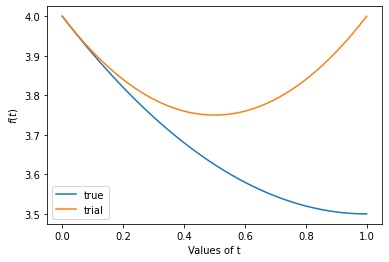

In [3]:
times = np.linspace(0,1,1000)
x_vals_true = polynomial(times)
plt.plot(times, x_vals_true, label = "true")
plt.plot(times, polynomial(times,a=2,v=-1), label = "trial")
plt.xlabel('Values of t')
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [4]:
def fitting(a_low, a_hi, v_low, v_hi, N):
    """
    METHOD: This function accepts the bounds of the `a` and `v` and the total number of grid points,
    constructs a grid on both the variables, and computes the fit of the polynomial function.

    INPUT:
    ------
    a_low: lowest range of acceleration value
    a_hi: highest range of acceleration value
    v_low: lowest range of velocity value
    v_hi: highest range of velocity value
    N:

    OUTPUT:
    Returns the rms array and the best fit point.
    """
    a = np.linspace(a_low, a_hi,N)
    v = np.linspace(v_low, v_hi,N)
    rms = []
    grid_points = []
    for v_val in v:
        for a_val in a:
            x_trial = polynomial(times, v=v_val, a=a_val)
            diff = x_vals_true - x_trial
            rms.append(np.sqrt(np.mean(diff**2)))
            grid_points.append((a_val, v_val))
    rms = np.array(rms)
    a_fit, v_fit = grid_points[np.argmin(rms)]  
    return (a_fit, v_fit, rms, a, v)

### Here we invoke the fitting function to calculated the fitted values of `a`, `v`, the `rms` values on the grid, and the `grid_points` itself.

In [5]:
# Note that the left hand side has the exact same order of the variables as 
# the return function in the previous cell. That means `a_fit` returned from 
# the function will be saved in `fitted_a_val`, and so forth.
N = 500
fitted_a_vals, fitted_v_vals, rms_vals, a_grid_val, v_grid_val = fitting(-2, 2, -4, 4, N)

## This is Becky's version

In [ ]:
def plotting(a_fit, v_fit, grid_points):
    """
    Plots the RMS array as a colormap.
    
    INPUT:
    ------
    a_fit: Best-fit acceleration
    v_fit: Best-fit velocity
    rms: Root mean square array
    grid_points: List of grid points

    OUTPUT: colormap
    """
    rms = []
    for a_val, v_val in grid_points:
        x_trial = polynomial(times, v=v_val, a=a_val)
        diff = x_vals_true - x_trial
        rms.append(np.sqrt(np.mean(diff**2)))
    rms = np.array(rms)
    
    A, V = np.meshgrid(a_fit, v_fit)
    rms_grid = rms.reshape((len(v_fit), len(a_fit)))
    plt.pcolormesh(A, V, rms_grid)
    plt.colorbar()
    plt.scatter(grid_points[np.argmin(rms)][0], grid_points[np.argmin(rms)][1])
    plt.show()

#how to use
#a_fit, v_fit, rms, grid_points = fitting(a_low, a_hi, v_low, v_hi, N)
#plotting(np.linspace(a_low, a_hi, N), np.linspace(v_low, v_hi, N), rms, grid_points)

## This is the version I created

In [6]:
def plotting(fitted_a_vals, fitted_v_vals, a_grid_val, v_grid_val, rms_vals, N=500):
    """
    Plots the RMS array as a colormap.
    
    INPUT:
    ------
    a_fit: Best-fit acceleration
    v_fit: Best-fit velocity
    rms: Root mean square array
    grid_points: List of grid points

    OUTPUT: colormap
    """
    A, V = np.meshgrid(a_grid_val, v_grid_val)
    rms_grid = rms_vals.reshape((N, N))
    plt.pcolormesh(A, V, rms_grid)
    plt.colorbar()
    plt.scatter(fitted_a_vals, fitted_v_vals)
    plt.xlabel('Value of a')
    plt.ylabel('Value of v')

    plt.show()

<ipython-input-6-d1d8e3e7b50e>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(A, V, rms_grid)


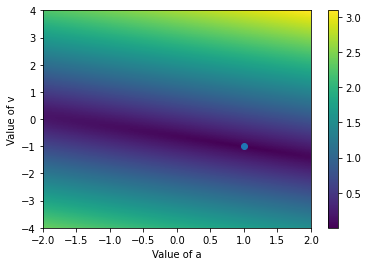

In [7]:
plotting(fitted_a_vals, fitted_v_vals, a_grid_val, v_grid_val, rms_vals)